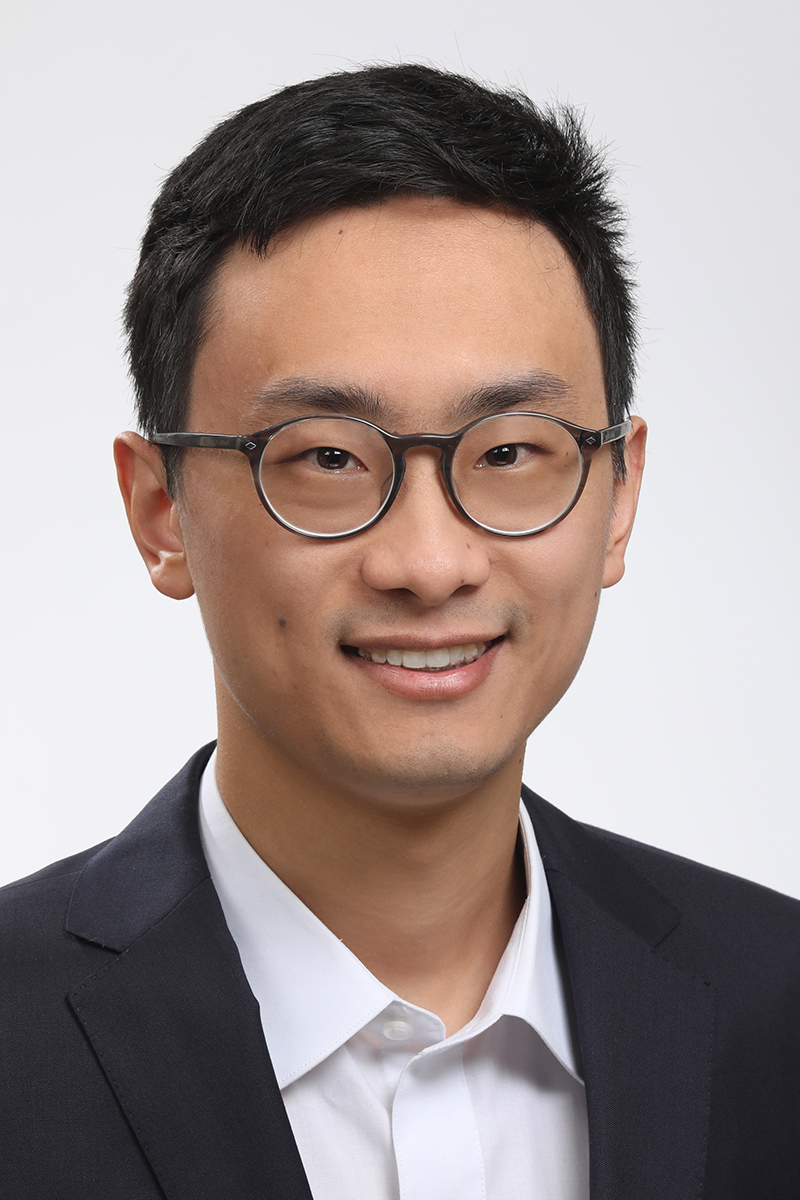

# LEARNING TO GENERATE DATA BY ESTIMATING GRADIENTS OF THE DATA DISTRIBUTION

# https://stacks.stanford.edu/file/zy983tp3399/submit-augmented.pdf

# A DISSERTATION SUBMITTED TO THE DEPARTMENT OF COMPUTER SCIENCE AND THE COMMITTEE ON GRADUATE STUDIES OF STANFORD UNIVERSITY IN PARTIAL FULFILLMENT OF THE REQUIREMENTS FOR THE DEGREE OF DOCTOR OF PHILOSOPHY

#Yang Song
#August 2022

# Abstract — Concise Summary

The dissertation addresses the fundamental difficulty of generating realistic high-dimensional data, such as images, audio, and molecular structures, using probabilistic models in which normalizing probability distributions becomes computationally intractable. To overcome this challenge, the work proposes modeling data distributions through their **score functions**, defined as the gradients of log densities,

$$
s(x) = \nabla_x \log p(x),
$$

which retain full local distributional information without requiring normalization and can be learned using highly expressive deep neural networks.

The dissertation is organized into three main parts.  
First, it develops efficient and statistically sound methodologies for estimating score functions from finite datasets, establishing theoretical guarantees such as consistency and stability while remaining scalable to high-dimensional settings.  
Second, it introduces a family of sampling strategies based on Langevin dynamics, diffusion processes, and differential equation formulations, in which data generation is achieved by reversing a gradual noising process. This leads to score-based generative models, commonly known as diffusion models, that achieve state-of-the-art performance and surpass generative adversarial networks on many benchmarks. These sampling procedures are further shown to be controllable, enabling strong performance on inverse problems such as medical image reconstruction.  
Third, the dissertation demonstrates that score-based models can be used to accurately evaluate probability values through continuous-time formulations, thereby closing the gap between likelihood-free generation and principled probabilistic evaluation.

Overall, the dissertation establishes score-based generative modeling as a flexible, powerful, and unified framework for data generation, inference, and evaluation across machine learning and scientific domains.

---

## One-Sentence Essence

The dissertation shows that learning and exploiting score functions provides a unified solution to normalization, sampling, controllability, and likelihood evaluation in high-dimensional generative modeling.


# Core Research Problems and Solutions

## Dissertation  
**Learning to Generate Data by Estimating Gradients of the Data Distribution**

---

## Problem 1: Normalization of High-Dimensional Probability Models

### The Problem

Most probabilistic generative models require computing or approximating a normalizing constant:

$$
p(x) = \frac{e^{-E(x)}}{Z}
$$

In high dimensions:

$$
Z = \int e^{-E(x)} \, dx
$$

is intractable.

As a result:

- Likelihood-based training becomes impractical.
- Model expressiveness is limited.
- Training becomes unstable.
- Scalability breaks down.

### The Solution

Abandon density modeling and model the **score function** instead:

$$
s(x) = \nabla_x \log p(x)
$$

Key insight:

- The score contains complete local information about the distribution.
- It does not require normalization.
- Training via score matching eliminates the normalizing constant \( Z \) entirely.

---

## Problem 2: Intractability of Score Matching in High Dimensions

### The Problem

Classical score matching requires:

- Computing divergences.
- Evaluating second-order derivatives.

The computational cost scales as:

$$
\mathcal{O}(d^2)
$$

This is infeasible for images, audio, or molecular data.

### The Solution

Introduce **Sliced Score Matching (SSM)**.

- Replace full divergence with random directional projections.

Benefits:

- Reduces complexity to:

$$
\mathcal{O}(d)
$$

- Retains statistical consistency.
- Scales to deep neural networks.

---

## Problem 3: Score Estimation Fails in Low-Density Regions

### The Problem

Real data lie near a low-dimensional manifold.

Outside this manifold:

- Data density is nearly zero.
- The score is undefined or unstable.

Direct score matching:

- Overfits near data points.
- Produces meaningless gradients elsewhere.

### The Solution

Use **Denoising Score Matching (DSM)**.

Add controlled Gaussian noise:

$$
\tilde{x} = x + \epsilon
$$

Learn the score of the perturbed distribution.

Effects:

- Smooths the data manifold.
- Makes the score well-defined everywhere.
- Stabilizes optimization.

---

## Problem 4: Single-Noise Models Cannot Generate High-Quality Samples

### The Problem

Training at a single noise level:

- High noise captures global structure.
- Low noise captures fine details.

A single model cannot achieve both.

### The Solution

Introduce **Noise Conditional Score Networks (NCSN)**.

Condition the score on the noise level:

$$
s_\theta(x, \sigma)
$$

Train across a hierarchy of noise scales.

Enables:

- Coarse-to-fine generation.
- Stable annealed sampling.

---

## Problem 5: Naïve Langevin Dynamics Mix Poorly

### The Problem

Standard Langevin dynamics:

- Gets trapped in local modes.
- Distorts relative mode probabilities.
- Performs poorly on multimodal distributions.

### The Solution

Develop **Annealed Langevin Dynamics**.

- Start sampling at high noise.
- Gradually reduce the noise level.

Result:

- Effective global exploration.
- Correct mode proportions.
- Reliable convergence.

---

## Problem 6: Discrete Noise Schedules Are Heuristic and Fragile

### The Problem

Discrete diffusion steps:

- Lack a unified theoretical foundation.
- Are sensitive to hyperparameters.
- Do not generalize well across domains.

### The Solution

Reformulate diffusion as continuous-time **Stochastic Differential Equations (SDEs)**.

Unified framework:

- Variance-Exploding (VE) SDE
- Variance-Preserving (VP) SDE
- Sub-Variance-Preserving (sub-VP) SDE

Benefits:

- Clean theoretical grounding.
- Flexible numerical solvers.
- Strong connections to physics.

---

## Problem 7: Sampling Is Slow and Computationally Expensive

### The Problem

Reverse diffusion requires:

- Thousands of score evaluations.
- High computational cost.

This limits practical deployment.

### The Solution

Introduce the **Probability Flow ODE**.

- Deterministic alternative to stochastic sampling.

Enables:

- Faster sampling.
- Adaptive step sizes.
- Invertible mappings.

---

## Problem 8: Score-Based Models Cannot Evaluate Likelihoods Easily

### The Problem

Score-based models do not define explicit densities.

Likelihood evaluation appears impossible.

### The Solution

Use change-of-variables along the probability flow ODE.

This enables:

- Exact or bounded likelihood computation.

Further improvements via:

- Likelihood weighting.
- Importance sampling.
- Variational dequantization.

---

## Problem 9: Existing Generative Models Are Hard to Control

### The Problem

GANs:

- No likelihoods.
- Poor handling of inverse problems.

VAEs:

- Blurry samples.
- Limited expressiveness.

### The Solution

Modify reverse-time dynamics to inject constraints.

- Solve inverse problems directly during sampling.

Demonstrated in:

- MRI reconstruction.
- CT reconstruction.
- Inpainting and denoising.

No retraining is required.

---

## Problem 10: Uncertainty Is Not Quantified

### The Problem

Most generative models:

- Produce point estimates.
- Lack principled uncertainty quantification.

### The Solution

Learn higher-order score functions.

- Estimate local covariance via second-order scores.

Enables:

- Uncertainty-aware denoising.
- Improved sampling dynamics.

---

## One-Sentence Master Summary

Yang Song systematically removed normalization, instability, poor mixing, and lack of control in generative modeling by replacing density estimation with score estimation, stabilizing it via noise, and unifying generation, likelihood evaluation, and inverse problems through stochastic differential equations.


# Research Objectives

## Overarching Objective

The overarching objective of the dissertation is:

To develop a unified, scalable, and theoretically grounded framework for high-dimensional generative modeling by learning and exploiting the score (gradient of the log-density) of data distributions.

Formally, the central object of interest is the score function

$$
s(x) = \nabla_x \log p(x)
$$

rather than the density \( p(x) \) itself.

---

## Specific Research Objectives

### Objective 1: Eliminate the Need for Density Normalization

Develop generative modeling methods that:

- Do not require evaluating or approximating normalizing constants.
- Avoid intractable likelihood computation.
- Enable the use of highly expressive neural networks without architectural constraints imposed by normalization.

---

### Objective 2: Learn Score Functions Reliably from Finite Data

Design statistically sound and computationally efficient methods to:

- Estimate score functions from samples alone.
- Scale to high-dimensional data such as images.

Ensure:

- Consistency.
- Stability.
- Practical tractability.

---

### Objective 3: Enable Stable and High-Quality Data Generation

Use learned score functions to:

- Generate realistic samples.
- Correctly represent multimodal distributions.

Overcome known failures of:

- GANs, including mode collapse and training instability.
- VAEs, including limited sample fidelity and expressiveness.

---

### Objective 4: Unify Discrete Diffusion and Continuous-Time Models

Reformulate score-based generation as:

- A continuous-time stochastic process.

Establish a single mathematical framework connecting:

- Score matching.
- Diffusion models.
- Stochastic differential equations (SDEs).
- Ordinary differential equations (ODEs).

---

### Objective 5: Make Sampling Controllable and Interpretable

Develop sampling procedures that can:

- Incorporate constraints.
- Solve inverse problems, such as medical imaging.
- Enable conditional generation without retraining.

---

### Objective 6: Enable Likelihood Evaluation and Model Comparison

Provide principled methods to:

- Compute or tightly bound likelihoods.
- Compare score-based models quantitatively.

Bridge the gap between:

- Likelihood-free generative methods.
- Likelihood-based evaluation frameworks.

---

### Objective 7: Quantify Uncertainty in Generative Modeling

Extend score modeling beyond first-order gradients.

Estimate higher-order information to:

- Quantify uncertainty.
- Improve denoising and sampling behavior.

---

# Research Questions

These objectives give rise to the following core research questions, which the dissertation explicitly or implicitly addresses.

---

## RQ1: Can Generative Modeling Be Performed Without Explicit Density Estimation?

Is it possible to fully characterize and sample from complex data distributions without ever computing

$$
p(x)
$$

itself?

What information is sufficient for generation if density values are unavailable?

---

## RQ2: How Can Score Functions Be Learned from Data Alone?

How can one estimate

$$
\nabla_x \log p_{\text{data}}(x)
$$

using only samples?

How can this estimation be made:

- Scalable.
- Stable.
- Statistically consistent in high dimensions?

---

## RQ3: How Can Sampling Be Performed Using Only Local Gradient Information?

Given access only to the score function:

- How can samples be generated?
- How can global structure emerge from local gradients?
- What stochastic or deterministic dynamics are suitable?

---

## RQ4: How Can Multimodal and Low-Density Regions Be Handled Robustly?

How can models avoid:

- Getting stuck in local modes?
- Producing incorrect mode probabilities?

How does noise injection reshape the learning problem?

---

## RQ5: Is There a Unified Theoretical Framework for Diffusion Models?

Can discrete diffusion models, such as DDPMs, and score-based methods be:

- Explained.
- Generalized.
- Extended.

under a single mathematical framework?

---

## RQ6: Can Score-Based Models Support Likelihood Evaluation?

If a model does not define an explicit density:

- Can likelihoods still be computed or bounded?
- Can score-based models compete with normalizing flows on likelihood metrics?

---

## RQ7: Can Generative Models Be Used as Solvers for Inverse Problems?

Can the sampling dynamics themselves incorporate observations?

Can generative models act as priors without retraining?

How does this compare to supervised reconstruction methods?

---

## RQ8: What Is the Role of Higher-Order Information?

Does modeling second-order or higher-order score information:

- Improve uncertainty estimation?
- Improve sampling efficiency or accuracy?

When is first-order information insufficient?

---

# One-Paragraph Synthesis

The dissertation investigates whether high-dimensional generative modeling can be reformulated around score estimation rather than density estimation, and whether such a reformulation can simultaneously solve long-standing problems of normalization, sampling quality, controllability, and likelihood evaluation. Through a sequence of methodological developments—score matching, noise conditioning, stochastic differential equations, and probability flow ordinary differential equations—the work answers these questions affirmatively and establishes score-based generative modeling as a unifying framework for modern diffusion models.


# Overall Methodological Philosophy

## Core Idea

Model the **score function**

$$
s(x) = \nabla_x \log p_{\text{data}}(x)
$$

instead of modeling the density

$$
p(x)
$$

itself.

## Why This Works

- The score does not require normalization.
- It avoids computing partition functions.
- It can be learned with standard regression-style objectives.
- It naturally connects to stochastic dynamics and diffusion processes.

---

# Part I – Learning Score Models from Data (Estimation Methodology)

## 1. Define the Learning Target

The learning target is the gradient of the log-density, not the density itself:

$$
\nabla_x \log p(x)
$$

This converts density learning into **vector field learning**.

---

## 2. Score Matching Framework

Use **Score Matching** (Hyvärinen) to train a neural network

$$
s_\theta(x)
$$

The objective minimizes

$$
\mathbb{E}_{p(x)} \left[ \left\| s_\theta(x) - \nabla_x \log p(x) \right\|^2 \right]
$$

Crucially:

- The unknown true score disappears after integration by parts.
- No likelihood or normalization constant is required.

---

## 3. Scalable Variants of Score Matching

### a) Sliced Score Matching (SSM)

- Replace full divergence with random projections.
- Reduces computational cost from

$$
\mathcal{O}(d^2)
$$

to

$$
\mathcal{O}(d)
$$

- Makes score learning feasible in high-dimensional spaces.

---

### b) Denoising Score Matching (DSM)

Add noise to the data:

$$
\tilde{x} = x + \epsilon, \quad \epsilon \sim \mathcal{N}(0, \sigma^2 I)
$$

Learn the score of the perturbed distribution.

**Benefits:**

- Stabilizes training.
- Handles low-density regions.
- Enables multi-scale learning.

---

## 4. Higher-Order Score Estimation

Extend the methodology to:

- Second-order scores (Hessians).
- Higher-order derivatives.

This is achieved via denoising and Tweedie’s formula.

**Enables:**

- Uncertainty estimation.
- Improved sampling dynamics.

---

# Part II – Generating Data from Learned Scores (Sampling Methodology)

## 5. Multi-Scale Noise Conditioning

Train **Noise Conditional Score Networks (NCSN)**:

$$
s_\theta(x, \sigma)
$$

The model learns scores at multiple noise levels.

This avoids manifold collapse and failures in low-density regions.

---

## 6. Sampling via Stochastic Dynamics

### a) Annealed Langevin Dynamics

Start from noise and iteratively update:

$$
x_{k+1} = x_k + \epsilon \, s_\theta(x_k, \sigma_k) + \sqrt{2\epsilon} \, z_k
$$

where

$$
z_k \sim \mathcal{N}(0, I)
$$

Noise is gradually reduced through annealing.

---

### b) Why Annealing Matters

- High noise enables exploration of global structure.
- Low noise refines fine details.
- Prevents mode collapse and poor mixing.

---

## 7. Continuous-Time Formulation with SDEs

Replace discrete noise schedules with **Stochastic Differential Equations**.

- **Forward process:** gradually diffuses data into pure noise.
- **Reverse process:** uses the learned score to reverse diffusion.

---

## 8. Reverse-Time SDE Solving

Sampling corresponds to solving

$$
dx = \left[ \text{drift}(x,t) - g(t)^2 s_\theta(x,t) \right] dt + g(t) \, d\bar{W}
$$

Implemented using:

- Predictor–Corrector samplers.
- Numerical SDE solvers.
- Probability Flow ODEs (deterministic alternative).

---

# Part III – Likelihood Evaluation (Inference Methodology)

## 9. Probability Flow ODE

Convert stochastic sampling into a deterministic ODE.

This enables:

- Exact likelihood computation.
- An invertible mapping between data and noise.

---

## 10. Likelihood Estimation

Use the change-of-variables formula along the ODE trajectory.

Introduce:

- Likelihood weighting.
- Importance sampling.
- Variance reduction techniques.

---

# Applied Methodology: Inverse Problems

## 11. Conditional Sampling for Inverse Problems

Modify the sampling dynamics to incorporate observations such as:

- MRI.
- CT.
- Inpainting.

Achieved by injecting measurement constraints into Langevin or SDE updates.

No retraining is required.

---

# Methodology Summary (One-Line View)

Estimate the score → condition on noise → reverse diffusion → sample or evaluate likelihood


# Summary of Results

The dissertation delivers theoretical, methodological, and empirical results that together establish score-based generative modeling as a dominant and unifying paradigm for modern diffusion models.

---

## 1. Results on Learning Score Functions

### Key Findings

- Score functions can be learned accurately from finite data using neural networks.
- Score matching and its variants, including sliced score matching and denoising score matching, are:
  - Statistically consistent.
  - Computationally scalable.
  - Stable in high-dimensional settings.

### Evidence

- Theoretical proofs establish:
  - Consistency.
  - Asymptotic normality.
- Empirical validation on:
  - Synthetic datasets.
  - MNIST.
  - CIFAR-10.
  - CelebA.
- Demonstrated that random projections preserve score information while substantially reducing computational complexity.

---

## 2. Results on Sample Quality and Generative Performance

### Key Findings

- Score-based models match or surpass GANs in sample quality.
- Generated samples exhibit:
  - High fidelity.
  - Strong diversity.
  - Correct multimodal structure, with no mode collapse.

### Evidence

- State-of-the-art FID and Inception scores on CIFAR-10 and CelebA.
- Visual results demonstrate:
  - Sharp details.
  - Global coherence.
  - Realistic textures.
- Successful generation at high resolutions, up to \( 1024 \times 1024 \).

---

## 3. Results on Sampling Dynamics

### Key Findings

- Annealed Langevin Dynamics significantly improves:
  - Mixing.
  - Mode coverage.
  - Stability.
- Continuous-time SDE formulations unify:
  - DDPMs.
  - Score matching with Langevin dynamics.
  - Novel diffusion variants.

### Evidence

- Experiments show that:
  - Naïve Langevin dynamics fails on multimodal distributions.
  - Annealing recovers correct mode proportions.
- Predictor–Corrector samplers reduce sampling error under fixed computational budgets.

---

## 4. Results on SDE and ODE Formulations

### Key Findings

- Reverse-time SDEs provide a general and principled foundation for diffusion models.
- The Probability Flow ODE:
  - Enables deterministic sampling.
  - Enables exact likelihood computation.
  - Reduces the number of function evaluations.

### Evidence

- Empirical comparisons demonstrate:
  - Faster sampling without loss of sample quality.
  - Stable and well-behaved trajectories.
- Demonstrated invertible mappings between noise and data.

---

## 5. Results on Likelihood Evaluation

### Key Findings

- Score-based models can compute and optimize likelihoods despite not explicitly modeling densities.
- Likelihood performance is competitive with:
  - Normalizing flows.
  - Autoregressive models.

### Evidence

- Derived:
  - Exact likelihood expressions via probability flow ODEs.
  - Tight likelihood bounds using importance sampling.
- Achieved strong bits-per-dimension results on CIFAR-10 and ImageNet-32.

---

## 6. Results on Inverse Problems and Controllability

### Key Findings

- Score-based generative models act as powerful priors for inverse problems.
- Constraints can be incorporated directly during sampling without retraining.

### Evidence

- Superior performance in:
  - MRI reconstruction.
  - CT reconstruction.
  - Image inpainting.
- Outperformed supervised baselines under limited measurement regimes.
- Demonstrated robustness to noise and undersampling.

---

## 7. Results on Uncertainty Quantification

### Key Findings

- Learning second-order score information enables:
  - Principled uncertainty estimation.
  - Improved denoising.
  - More reliable sampling dynamics.

### Evidence

- Visualized covariance structures align with semantic ambiguity in data.
- Quantified uncertainty reflects multiple plausible reconstructions rather than single point estimates.


# Summary of Conclusions

The dissertation reaches several foundational conclusions that reshaped modern generative modeling.

---

## Conclusion 1: Density Estimation Is Not Necessary for Generation

Modeling the score function is sufficient for learning, sampling, and inference in high-dimensional data distributions.

This result fundamentally challenges decades of likelihood-centric generative modeling, demonstrating that explicit density estimation is not a prerequisite for effective generation or inference.

---

## Conclusion 2: Diffusion Models Are Score-Based Models in Disguise

Modern diffusion models are best understood as numerical solvers of reverse-time stochastic differential equations guided by learned score functions.

This interpretation unifies:

- DDPMs.
- Score matching Langevin dynamics.
- Continuous-time diffusion models.

Under a single mathematical and conceptual framework.

---

## Conclusion 3: Noise Is a Feature, Not a Bug

Injecting noise is essential for both learning and sampling.

Noise:

- Regularizes score estimation.
- Enables global-to-local generation.
- Stabilizes optimization and stochastic dynamics.

Rather than degrading performance, noise is a critical structural component of the framework.

---

## Conclusion 4: Generative Models Can Be Solvers, Not Just Samplers

Score-based models are not limited to unconditional generation.

By modifying sampling dynamics, they can directly solve inverse problems through controlled stochastic or deterministic processes.

This positions generative models as general inference engines rather than passive sample generators.

---

## Conclusion 5: Likelihood-Free and Likelihood-Based Modeling Can Be Unified

Score-based models bridge the historical gap between expressiveness and principled evaluation.

They simultaneously offer:

- High sample quality.
- Likelihood evaluation.
- Theoretical guarantees.

This unification resolves a long-standing tension in generative modeling.

---

## Conclusion 6: Score-Based Modeling Is a General Framework

Score estimation provides a unifying language connecting:

- Statistics.
- Physics.
- Stochastic processes.
- Deep learning.

The framework naturally extends beyond images to domains such as:

- Audio.
- Molecular modeling.
- Scientific inference.

---

## Final One-Sentence Conclusion

The dissertation establishes score-based generative modeling as a unified, scalable, and theoretically grounded framework that resolves normalization, sampling, controllability, and likelihood challenges in high-dimensional generative modeling, laying the foundation for modern diffusion models.


# How Yang Song Classifies Generative Models

At a high level, the thesis classifies generative models by how they represent and interact with probability distributions, especially with respect to normalization, tractability, and usability for generation and inference.

---

## 1. Explicit Density Models (Likelihood-Based Models)

### Definition

Models that explicitly define a probability density

$$
p_\theta(x)
$$

and are trained by maximizing likelihood or minimizing negative log-likelihood.

### Examples

- Autoregressive models  
- Normalizing flows  
- Some energy-based models with tractable partition functions  

### Strengths

- Exact or tractable likelihood evaluation  
- Strong theoretical grounding  
- Direct statistical interpretation  

### Limitations (as identified in the thesis)

- Normalization is a central bottleneck  
- Architectural restrictions are often imposed to keep likelihood tractable  
- Limited flexibility for very high-dimensional data  
- Sampling can be slow or sequential  

### Author’s Position

These models are principled but over-constrained by normalization requirements, which limits expressiveness and scalability.

---

## 2. Implicit Generative Models

### Definition

Models that define a sampling procedure but do not define an explicit density.

### Examples

- GANs  
- Generator-based simulation models  

### Strengths

- High sample quality  
- Efficient parallel sampling  
- Flexible architectures  

### Limitations

- No likelihood evaluation  
- Mode collapse  
- Training instability  
- Limited theoretical guarantees  

### Author’s Position

Implicit models excel at visual realism but lack probabilistic interpretability and controllability.

---

## 3. Energy-Based Models (Unnormalized Models)

### Definition

Models that define an unnormalized density

$$
p(x) \propto e^{-E_\theta(x)}
$$

### Strengths

- Flexible representation  
- Can model complex dependencies  

### Limitations

- Partition function is intractable  

$$
Z = \int e^{-E_\theta(x)} \, dx
$$

- Training and sampling are difficult  
- MCMC mixing is slow in high dimensions  

### Author’s Position

Energy-based models are expressive but computationally impractical at scale due to normalization and sampling difficulties.

---

## 4. Score-Based Models (Central Contribution)

### Definition

Models that do not represent densities explicitly, but instead model the score function

$$
s(x) = \nabla_x \log p(x)
$$

### Key Characteristics

- No normalization constant required  
- Trained via score matching  
- Defined as vector fields over data space  
- Sampling via stochastic dynamics  

### Strengths

- Fully bypass normalization  
- Highly expressive neural architectures  
- Stable training with noise conditioning  
- Unified framework for diffusion models  

### Author’s Position

Score-based models retain the strengths of probabilistic modeling without inheriting the normalization burden.

---

## 5. Diffusion Models as a Subclass of Score-Based Models

### Key Insight of the Thesis

Diffusion models are score-based models implemented via stochastic processes.

### Classification Logic

Diffusion models:

- Gradually corrupt data with noise  
- Learn scores of intermediate noisy distributions  
- Reverse the process for generation  

This places diffusion models squarely within the score-based category rather than as a separate family.

### Includes

- DDPMs  
- Score Matching Langevin Dynamics (SMLD)  
- Continuous-time Score-SDE models  

---

## 6. Continuous-Time vs Discrete-Time Generative Models

The thesis further classifies models by their time formulation.

### Discrete-Time

- DDPM-style diffusion  
- Discrete noise schedules  
- Stepwise denoising  

### Continuous-Time

- SDE-based diffusion  
- Probability Flow ODEs  
- Unified theoretical framework  

### Author’s Position

Continuous-time formulations generalize and subsume discrete diffusion models.

---

## Summary Table (Author’s Implicit Taxonomy)

| Category | Density Explicit? | Normalized? | Likelihood? | Sampling | Limitations |
|--------|------------------|-------------|-------------|----------|-------------|
| Explicit Density Models | Yes, $$p_\theta(x)$$ | Yes | Yes | Often slow | Restricted architectures |
| Implicit Models (GANs) | No | N/A | No | Fast | Mode collapse, no likelihood |
| Energy-Based Models | Yes (unnormalized) $$e^{-E_\theta(x)}$$ | No | No | Slow MCMC | Intractable $$Z$$ |
| Score-Based Models | No | No | Via ODE | Stochastic / ODE | Compute-heavy |
| Diffusion Models | No | No | Via SDE / ODE | Stable | Sampling cost |

---

## One-Sentence Core Classification Insight

Yang Song classifies generative models by how they interact with probability distributions, showing that score-based models uniquely avoid normalization while retaining probabilistic structure, and that diffusion models are a principled instantiation of this idea.
